In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2025-08-05 17:39:02.204385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754415542.391611      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754415542.446390      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
final_df=pd.read_csv("/kaggle/input/final-df/final_df_processed.csv")

In [3]:
# Step 1: Drop missing values
df = final_df.dropna()

# Step 2: Features and target
features = ['Carga Real_forecast', 'temperature_loc1', 'temperature_loc2', 'temperature_loc3']
target = 'Carga Real_actual'

# Step 3: Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

In [4]:
df.head()

,Fecha Hora,Carga Real_actual,Carga Real_forecast,temperature_loc1,temperature_loc2,temperature_loc3
0,2016-01-02 00:00:00,1004.4597,1056.9,296.89752,298.60065,300.06940
1,2016-01-02 00:00:00,1004.4597,1056.9,296.89752,298.60846,300.06940
2,2016-01-02 01:00:00,978.7889,1057.1,296.63240,298.23395,299.85895
3,2016-01-02 01:00:00,978.7889,1057.1,296.63240,298.21832,299.85895
4,2016-01-02 02:00:00,954.4416,996.5,296.53757,297.95944,299.68600


In [5]:

# Step 4: Create sequences
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

seq_len = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_len)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [6]:
'''
# Step 6: LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Step 7: Training
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Step 8: Prediction and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Step 9: Results as DataFrame
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})
results.head()
'''

"\n# Step 6: LSTM model\nmodel = Sequential([\n    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),\n    Dense(1)\n])\nmodel.compile(optimizer='adam', loss='mse')\n\n# Step 7: Training\nmodel.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)\n\n# Step 8: Prediction and inverse transform\ny_pred_scaled = model.predict(X_test)\ny_pred = scaler_y.inverse_transform(y_pred_scaled)\ny_true = scaler_y.inverse_transform(y_test)\n\n# Step 9: Results as DataFrame\nresults = pd.DataFrame({\n    'Actual Load': y_true.flatten(),\n    'Predicted Load': y_pred.flatten()\n})\nresults.head()\n"

In [7]:
'''
# Step 8: Prediction and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Step 9: Results as DataFrame
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})
results.head()
'''

"\n# Step 8: Prediction and inverse transform\ny_pred_scaled = model.predict(X_test)\ny_pred = scaler_y.inverse_transform(y_pred_scaled)\ny_true = scaler_y.inverse_transform(y_test)\n\n# Step 9: Results as DataFrame\nresults = pd.DataFrame({\n    'Actual Load': y_true.flatten(),\n    'Predicted Load': y_pred.flatten()\n})\nresults.head()\n"

In [8]:


# Define model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mse')

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



I0000 00:00:1754415554.443990      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Results
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})


Epoch 1/100


I0000 00:00:1754415559.232522      57 cuda_dnn.cc:529] Loaded cuDNN version 90300


1806/1806 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0103 - val_loss: 0.0030
Epoch 2/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 3/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 6/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 8/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 9/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 11/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 12/100
1806/18

📊 Mean Absolute Error (MAE): 54.58
📊 Root Mean Squared Error (RMSE): 71.89
📊 Mean Absolute Percentage Error (MAPE): 4.58%


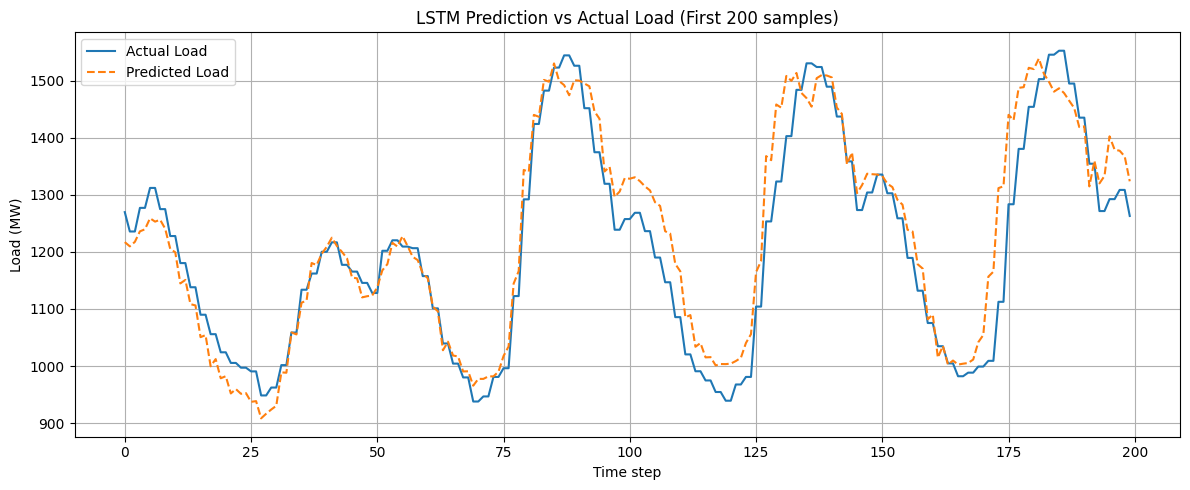

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure you've already predicted and inverse-transformed:
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_true = scaler_y.inverse_transform(y_test)

# 1. Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 2. Plot predictions
plt.figure(figsize=(12, 5))
plt.plot(y_true[:200], label='Actual Load')
plt.plot(y_pred[:200], label='Predicted Load', linestyle='--')
plt.title('LSTM Prediction vs Actual Load (First 200 samples)')
plt.xlabel('Time step')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
